## Problem Statement

Ames, IA is an agriculturally-rich town in located in central Iowa. It is the eighth largest city in Iowa and home to Iowa State University. It was ranked ninth on CNNMoney's "[Best Places to Live](#https://money.cnn.com/magazines/moneymag/bplive/2010/)" list in 2010. 

The city has expanded considerably in the past two decades, with the total population expanding 30% from 50,731 residents in 2000 to 66,258 in 2019. Ames added over 5000 housing units in the years between 2000 and 2010, and while the 2020 census information has not been tabulated, the city's growth suggests that the total number of housing units also grew in the last decade. 

The municipality's steady growth means that builders are looking to construct homes that meet the needs of modern invididuals and families. To that end, the analysis detailed below is looking at what key construction features make the house the most appealing to home buyers and thereby garner a higher sale price. 

The analysis investigates the relationship between the sale price of a house and any bonus auxiliary structures -- i.e. basements, garages, and any other space adjacent to the main living area that could be used as storage or be used as alternative/additonal living or activity places while being separate from the main space in the house. My analysis focused on basements and garages, but a project of a larger scope could look at sheds, cover patios, attached dwelling units, and other enclosed areas. The data shows that including at least one of these features will increase the home price considerably, so this is an important item for housing developers to consider. 

### Data & Resources 

+ The Ames, IA real estate data comes from the Ames Assessor's office and contains records from individual property sales in the municipality from 2006 to 2010. It has been used to compute assessed values for residential properties. 
    - Reference URL: [Data Description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
    - [Data Dictionary](https://www.kaggle.com/c/dsir-1116-ames-regression-challenge/data)
    
+ The Ames, IA population counts and other census data came from the [Ames' Wikipedia page](https://en.wikipedia.org/wiki/Ames,_Iowa#2010_census).

In [2]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm

In [3]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_2/code'

In [4]:
# loading in datasets

ames = pd.read_csv('../data/train.csv')
ames_test = pd.read_csv('../data/test.csv')

In [5]:
len(ames)

2051

In [6]:
len(ames_test)

878

**Data Dictionary:** 
https://www.kaggle.com/c/dsir-1116-ames-regression-challenge/data

## Basic EDA

In [7]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [9]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [10]:
ames.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [11]:
# putting nulls into dataframe

nulls = pd.DataFrame(ames.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,330
...,...
Misc Val,0
Mo Sold,0
Yr Sold,0
Sale Type,0


In [12]:
#count of null values for each feature with null values 

nulls[nulls[0]!=0]

,0
Lot Frontage,330
Alley,1911
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Qual,55
Bsmt Cond,55
Bsmt Exposure,58
BsmtFin Type 1,55
BsmtFin SF 1,1
BsmtFin Type 2,56


In [13]:
# checking out the columns (now rows) with null values 

ames.loc[:, ames.isna().any()].T

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Lot Frontage,NaN,43,68,73,82,137,35,NaN,NaN,70,...,110,45,50,65,96,79,NaN,57,80,60
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Grvl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Type,BrkFace,BrkFace,None,None,None,None,BrkFace,BrkFace,None,BrkFace,...,BrkFace,None,None,BrkFace,Stone,None,None,None,None,None
Mas Vnr Area,289,132,0,0,0,0,82,180,0,192,...,664,0,0,38,426,0,0,0,0,0
Bsmt Qual,TA,Gd,TA,Gd,Fa,TA,Gd,TA,TA,Gd,...,Ex,TA,TA,Gd,Ex,Gd,TA,TA,TA,TA
Bsmt Cond,TA,TA,TA,TA,Gd,TA,TA,TA,TA,TA,...,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA
Bsmt Exposure,No,No,No,No,No,No,Gd,No,No,Av,...,Av,No,Mn,No,Av,Av,No,No,No,No
BsmtFin Type 1,GLQ,GLQ,GLQ,Unf,Unf,ALQ,GLQ,Rec,Rec,Rec,...,GLQ,Unf,Rec,GLQ,GLQ,GLQ,BLQ,Unf,Rec,Unf
BsmtFin SF 1,533,637,731,0,0,247,547,1000,292,650,...,1016,0,276,362,1336,1011,262,0,155,0
BsmtFin Type 2,Unf,Unf,Unf,Unf,Unf,Rec,Unf,Unf,Unf,Unf,...,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,LwQ,Unf


_Since it's too large to see everything, I'm printing training dataframe in 15-column increments to investigate what is included_

In [14]:
ames.iloc[:,0:16]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm


In [15]:
ames.iloc[:,16:31]

,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation
0,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock
1,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc
2,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock
3,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc
4,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc
2047,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock
2048,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil
2049,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock


In [16]:
ames.iloc[:,31:46]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF
0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754
1,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209
2,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0
3,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700
4,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0
2047,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0
2048,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741
2049,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,GasA,TA,Y,SBrkr,1200,0


In [17]:
ames.iloc[:,46:61]

,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt
0,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0
1,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0
2,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0
3,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0
4,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0
2047,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0
2048,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0
2049,0,1200,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956.0


In [18]:
ames.iloc[:,61:81]

,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,Unf,1.0,294.0,TA,TA,Y,0,189,140,0,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


### Dealing with null values 

##### Numeric columns only 

In [19]:
ames.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [20]:
# as above, trying see all the null values
nulls = pd.DataFrame(ames.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,330
...,...
Misc Val,0
Mo Sold,0
Yr Sold,0
Sale Type,0


In [21]:
#count of null values for each feature with null values 
nulls_df = nulls[nulls[0]!=0]
nulls_df

## for categorical variables, the null values will be ignored i.e. turned to zero in the newly created columns. 
## Citation: https://stackoverflow.com/questions/51147326/python-nulls-are-getting-dropped-by-pd-get-dummies
## So pay close attention to this! 

,0
Lot Frontage,330
Alley,1911
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Qual,55
Bsmt Cond,55
Bsmt Exposure,58
BsmtFin Type 1,55
BsmtFin SF 1,1
BsmtFin Type 2,56


In [22]:
ames[ames['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [23]:
# only one with null value so dropping 
ames = ames[ames['BsmtFin SF 1'].notna()]
ames = ames[ames['Garage Area'].notna()]

In [24]:
# replacing null values in Lot Frontage with mean of column
ames['Lot Frontage'].fillna(ames['Lot Frontage'].mean(), inplace=True)

In [25]:
# replacing null values in Mason Veneer Area with mean of column
ames['Mas Vnr Area'].fillna(ames['Mas Vnr Area'].mean(), inplace=True)

In [26]:
ames['Garage Yr Blt'].mean()

1978.7246900826447

In [27]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [28]:
ames['Garage Yr Blt'].isnull().sum()

113

In [29]:
# Garage year built: replacing nulls with mean year built 
ames['Garage Yr Blt'].fillna(ames['Garage Yr Blt'].mean(), inplace=True)

In [30]:
# TEST DF

ames_test['Garage Yr Blt'].fillna(ames_test['Garage Yr Blt'].mean(), inplace=True)

In [31]:
# checking my nulls_df is doing what I want it to do 
ames['Alley'].isnull().sum()

1909

In [32]:
# For test set now: replacing null values in these two columns with their means 

ames_test['Lot Frontage'].fillna(ames_test['Lot Frontage'].mean(), inplace=True)
ames_test['Mas Vnr Area'].fillna(ames_test['Mas Vnr Area'].mean(), inplace=True)

In [33]:
ames_test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [34]:
ames_test['Misc Feature'].notna().sum()

41

In [35]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Pickling Cleaned DataFrames 

_Storing the dataframes at this stage so I don't lose them._

In [36]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_2/code'

In [37]:
ames.to_pickle("../data/ames_clean.pkl")

In [38]:
ames_test.to_pickle("../data/ames_test_clean.pkl")

### Value Counts

##### Value Counts for some Categorical variables:

In [39]:
cat_features = ['MS SubClass', 'MS Zoning', 'Alley', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',\
                'Bsmt Exposure', 'Foundation', 'Bsmt Cond', 'Heating', 'Central Air', 'Electrical', 'Kitchen AbvGr', 'Kitchen Qual', 'Paved Drive', 'Fence',\
               'Misc Feature', 'Mo Sold', 'Sale Type']

nl = '\n'
for feature in cat_features: 
    print(f'Value Counts for {feature.upper()}:{nl}{ames[feature].value_counts()}')

Value Counts for MS SUBCLASS:
20     769
60     394
50     198
120    132
30     101
70      89
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64
Value Counts for MS ZONING:
RL         1598
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Value Counts for ALLEY:
Grvl    85
Pave    55
Name: Alley, dtype: int64
Value Counts for STREET:
Pave    2042
Grvl       7
Name: Street, dtype: int64
Value Counts for LOT SHAPE:
Reg    1294
IR1     691
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
Value Counts for LAND CONTOUR:
Lvl    1841
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
Value Counts for UTILITIES:
AllPub    2047
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
Value Counts for LOT CONFIG:
Inside     1502
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Co

In [40]:
nulls = pd.DataFrame(ames.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Misc Val,0
Mo Sold,0
Yr Sold,0
Sale Type,0


In [41]:
nulls_count = nulls[nulls[0]!=0]
nulls_count

,0
Alley,1909
Mas Vnr Type,22
Bsmt Qual,54
Bsmt Cond,54
Bsmt Exposure,57
BsmtFin Type 1,54
BsmtFin Type 2,55
Bsmt Full Bath,1
Bsmt Half Bath,1
Fireplace Qu,998


### Dummifying Some Categorial Variables

### _Garages_

#### _**Finding all the garage-related columns**_

In [42]:
garage_cols = [col for col in ames.columns if 'garage' in col or 'Garage' in col]
garage_cols

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

#### _**Adding Dummified Columns to indicate whether the property has the following types of garages**_

In [43]:
ames['Garage Cars'].value_counts()

2.0    1136
1.0     523
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [44]:
ames[ames['Garage Cars'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


#### **has_garage**

In [45]:
# adding garage columns 
# ames['has_garage'] = 
ames.loc[ames['Garage Cars'] == 0, 'has_garage'] = 0
ames.loc[ames['Garage Cars'] > 0, 'has_garage'] = 1

# citation:
# https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

In [46]:
ames['has_garage'].value_counts()

1.0    1936
0.0     113
Name: has_garage, dtype: int64

In [47]:
ames['Garage Type'].value_counts()

Attchd     1213
Detchd      534
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [48]:
# TEST DF

ames_test.loc[ames_test['Garage Cars'] == 0, 'has_garage'] = 0
ames_test.loc[ames_test['Garage Cars'] > 0, 'has_garage'] = 1

#### **garage_attached**

In [49]:
# making "Garage attached" column -- 1 for attached, builtin, basement 
 
ames.loc[~ames['Garage Type'].isin(['Attchd', 'BuiltIn', 'Basment', '2Types']), 'garage_attached'] = 0
ames.loc[ames['Garage Type'].isin(['Attchd', 'BuiltIn', 'Basment', '2Types']), 'garage_attached'] = 1

# citation for "isin":
# https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [50]:
# TEST DF 

ames_test.loc[~ames_test['Garage Type'].isin(['Attchd', 'BuiltIn', 'Basment', '2Types']), 'garage_attached'] = 0
ames_test.loc[ames_test['Garage Type'].isin(['Attchd', 'BuiltIn', 'Basment', '2Types']), 'garage_attached'] = 1

#### **garage_large**

In [51]:
# making column called "garage large" for garages that are 2-car size or bigger 

ames.loc[ames['Garage Cars'] < 2, 'garage_large'] = 0
ames.loc[ames['Garage Cars'] >= 2, 'garage_large'] = 1

In [52]:
# TEST DF 

ames_test.loc[ames_test['Garage Cars'] < 2, 'garage_large'] = 0
ames_test.loc[ames_test['Garage Cars'] >= 2, 'garage_large'] = 1

In [53]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,garage_attached,garage_large
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,3,2010,WD,130500,1.0,1.0,1.0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,4,2009,WD,220000,1.0,1.0,1.0
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,1,2010,WD,109000,1.0,0.0,0.0
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,174000,1.0,1.0,1.0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,3,2010,WD,138500,1.0,0.0,1.0


In [54]:
ames['Garage Qual'].value_counts()

TA    1831
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [55]:
ames['Garage Cond'].value_counts()

TA    1867
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [56]:
ames['Garage Cond'].isnull().sum()

113

#### **garage_nice**

In [57]:
# creating column that has '1' if garage condition OR quality is Excellent or good 
# i.e. these have extra nice garages 

ames.loc[((ames['Garage Qual']=='Ex') | (ames['Garage Qual']=='Gd')), 'garage_nice'] = 1
ames.loc[((ames['Garage Cond']=='Ex') | (ames['Garage Cond']=='Gd')), 'garage_nice'] = 1

In [58]:
ames['garage_nice'].value_counts()

1.0    27
Name: garage_nice, dtype: int64

In [59]:
ames['garage_nice'].isnull().sum()

2022

In [60]:
# filling nulls in garage nice col 

ames['garage_nice'].fillna(0, inplace=True)

In [61]:
# TEST DF 

ames_test.loc[((ames_test['Garage Qual']=='Ex') | (ames_test['Garage Qual']=='Gd')), 'garage_nice'] = 1

In [62]:
# TEST DF: filling nulls in garage nice col 

ames_test['garage_nice'].fillna(0, inplace=True)

In [63]:
# garage finish: replacing null values with "no garage" so can dummify column 

ames['Garage Finish'].fillna('no_garage', inplace=True)

In [64]:
ames['Garage Finish'].value_counts()

Unf          848
RFn          579
Fin          509
no_garage    113
Name: Garage Finish, dtype: int64

In [65]:
# now dummifying garage finish 

ames = pd.get_dummies(data=ames, columns=['Garage Finish'], prefix='garage', drop_first=True)

In [66]:
# TEST DF 

ames_test = pd.get_dummies(data=ames_test, columns=['Garage Finish'], prefix='garage', drop_first=True)

In [67]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Yr Sold,Sale Type,SalePrice,has_garage,garage_attached,garage_large,garage_nice,garage_RFn,garage_Unf,garage_no_garage
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,2010,WD,130500,1.0,1.0,1.0,0.0,1,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,2009,WD,220000,1.0,1.0,1.0,0.0,1,0,0
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,2010,WD,109000,1.0,0.0,0.0,0.0,0,1,0
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,2010,WD,174000,1.0,1.0,1.0,0.0,0,0,0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,2010,WD,138500,1.0,0.0,1.0,0.0,0,1,0


#### **Garage Year Built**

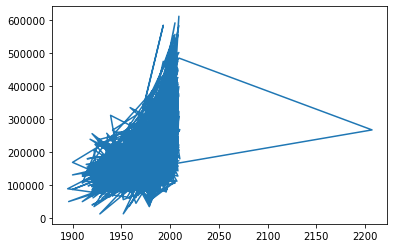

In [68]:
# checking out correlation with year garage is built 
plt.plot(ames['Garage Yr Blt'], ames['SalePrice'])
plt.show()

In [69]:
# making weird year in the future into mean for garage year built 
ames['Garage Yr Blt'][ames['Garage Yr Blt'] >2050]

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [70]:
ames['Garage Yr Blt'].mean()

1978.7246900826422

In [71]:
ames.loc[ames['Garage Yr Blt']>2050, 'Garage Yr Blt'] = ames['Garage Yr Blt'].mean()

# citation: https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas

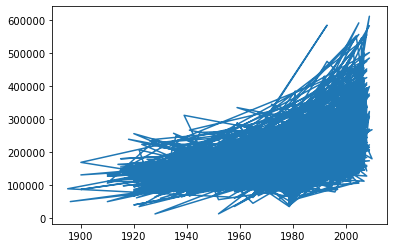

In [72]:
# checking this out again
plt.plot(ames['Garage Yr Blt'], ames['SalePrice'])
plt.show()

In [73]:
ames['Garage Yr Blt'].isnull().sum()

0

In [74]:
# doing this again
garage_cols = [col for col in ames.columns if 'garage' in col or 'Garage' in col]
garage_cols

['Garage Type',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf',
 'garage_no_garage']

In [75]:
ames['garage_no_garage'].value_counts()

0    1936
1     113
Name: garage_no_garage, dtype: int64

In [76]:
ames = ames.drop(columns=['garage_no_garage'], axis=1)

In [77]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,garage_attached,garage_large,garage_nice,garage_RFn,garage_Unf
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,3,2010,WD,130500,1.0,1.0,1.0,0.0,1,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,4,2009,WD,220000,1.0,1.0,1.0,0.0,1,0
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,1,2010,WD,109000,1.0,0.0,0.0,0.0,0,1
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,4,2010,WD,174000,1.0,1.0,1.0,0.0,0,0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,3,2010,WD,138500,1.0,0.0,1.0,0.0,0,1


### _Fireplaces_

In [78]:
ames['Fireplaces'].value_counts()

0    998
1    898
2    146
3      6
4      1
Name: Fireplaces, dtype: int64

In [79]:
# creating a column that indicates whether the house has a fireplace or not 

ames['has_fireplace'] = pd.Categorical(ames['Fireplaces']>=1).astype(np.int8)

In [80]:
ames['has_fireplace'].value_counts()

1    1051
0     998
Name: has_fireplace, dtype: int64

In [81]:
# TEST DF

ames_test['has_fireplace'] = pd.Categorical(ames_test['Fireplaces']>=1).astype(np.int8)

In [82]:
len(ames.columns)

87

In [83]:
len(ames_test.columns)

86

In [84]:
[x for x in ames.columns if x not in ames_test.columns]

['SalePrice']

### _Basements_

In [87]:
basement_cols = [col for col in ames.columns if 'Bsmt' in col]
basement_cols

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [88]:
ames[basement_cols].isnull().sum()

Bsmt Qual         54
Bsmt Cond         54
Bsmt Exposure     57
BsmtFin Type 1    54
BsmtFin SF 1       0
BsmtFin Type 2    55
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     1
Bsmt Half Bath     1
dtype: int64

In [89]:
ames['Bsmt Qual'].value_counts()

TA    887
Gd    863
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

_Filling nulls in train, test with 'no-basement' so can dummify_

In [90]:
ames['Bsmt Qual'].fillna('no_basement', inplace=True)
ames_test['Bsmt Qual'].fillna('no_basement', inplace=True)

In [91]:
ames['Bsmt Cond'].fillna('no_basement', inplace=True)
ames_test['Bsmt Cond'].fillna('no_basement', inplace=True)

In [92]:
ames['Bsmt Exposure'].fillna('no_basement', inplace=True)
ames_test['Bsmt Exposure'].fillna('no_basement', inplace=True)

In [93]:
ames['BsmtFin Type 1'].fillna('no_basement', inplace=True)
ames_test['BsmtFin Type 1'].fillna('no_basement', inplace=True)

In [94]:
ames['BsmtFin Type 2'].fillna('no_basement', inplace=True)
ames_test['BsmtFin Type 2'].fillna('no_basement', inplace=True)

In [95]:
# binning basement quality 

ames.loc[ames['Bsmt Qual'] == 'Gd', 'Basement Quality'] = 'above_average'
ames.loc[ames['Bsmt Qual'] == 'Ex', 'Basement Quality'] = 'above_average'
ames.loc[ames['Bsmt Qual'] == 'TA', 'Basement Quality'] = 'average'
ames.loc[ames['Bsmt Qual'] == 'Fa', 'Basement Quality'] = 'average'
ames.loc[ames['Bsmt Qual'] == 'Po', 'Basement Quality'] = 'none_or_below_average'
ames.loc[ames['Bsmt Qual'] == 'no_basement', 'Basement Quality'] = 'none_or_below_average'

In [96]:
# TEST DF: binning basement quality 

ames_test.loc[ames['Bsmt Qual'] == 'Gd', 'Basement Quality'] = 'above_average'
ames_test.loc[ames['Bsmt Qual'] == 'Ex', 'Basement Quality'] = 'above_average'
ames_test.loc[ames['Bsmt Qual'] == 'TA', 'Basement Quality'] = 'average'
ames_test.loc[ames['Bsmt Qual'] == 'Fa', 'Basement Quality'] = 'average'
ames_test.loc[ames['Bsmt Qual'] == 'Po', 'Basement Quality'] = 'none_or_below_average'
ames_test.loc[ames['Bsmt Qual'] == 'no_basement', 'Basement Quality'] = 'none_or_below_average'

In [97]:
ames['Basement Quality'].value_counts()

above_average            1047
average                   947
none_or_below_average      55
Name: Basement Quality, dtype: int64

In [98]:
ames_test['Basement Quality'].value_counts()

above_average            435
average                  419
none_or_below_average     24
Name: Basement Quality, dtype: int64

In [99]:
# dummifying basement quality 

ames = pd.get_dummies(data=ames, columns=['Basement Quality'], drop_first=True)
ames_test = pd.get_dummies(data=ames_test, columns=['Basement Quality'], drop_first=True)

In [100]:
ames[basement_cols].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    1
Bsmt Half Bath    1
dtype: int64

In [101]:
ames['Bsmt Exposure'].value_counts()

No             1338
Av              288
Gd              203
Mn              163
no_basement      57
Name: Bsmt Exposure, dtype: int64

In [102]:
# dummifying basement exposure 

ames = pd.get_dummies(data=ames, columns=['Bsmt Exposure'], drop_first=True)
ames_test = pd.get_dummies(data=ames_test, columns=['Bsmt Exposure'], drop_first=True)

In [103]:
# checking for sanity
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,garage_nice,garage_RFn,garage_Unf,has_fireplace,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0.0,0,1,0,1,0,0,0,1,0
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0.0,0,0,0,0,0,0,0,1,0
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,0.0,1,0,1,1,0,0,0,0,0
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0.0,0,1,0,0,0,0,0,1,0
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,0.0,1,0,1,1,0,0,0,1,0


In [104]:
ames['BsmtFin Type 1'].value_counts()

GLQ            615
Unf            603
ALQ            292
BLQ            200
Rec            183
LwQ            102
no_basement     54
Name: BsmtFin Type 1, dtype: int64

In [105]:
# just curious
ames.groupby('BsmtFin Type 1')[['SalePrice']].mean().sort_values(by=['SalePrice'], ascending=False)

,SalePrice
BsmtFin Type 1,
GLQ,237597.245528
Unf,166155.257048
ALQ,164414.109589
LwQ,153266.921569
BLQ,150107.020000
Rec,143263.382514
no_basement,106847.666667


In [106]:
# binning basement finish 

ames.loc[ames['BsmtFin Type 1'] == 'GLQ', 'Basement Finish 1'] = 'above_average'
ames.loc[ames['BsmtFin Type 1'] == 'ALQ', 'Basement Finish 1'] = 'average'
ames.loc[ames['BsmtFin Type 1'] == 'Rec', 'Basement Finish 1'] = 'average'
ames.loc[ames['BsmtFin Type 1'] == 'BLQ', 'Basement Finish 1'] = 'below_average'
ames.loc[ames['BsmtFin Type 1'] == 'LwQ', 'Basement Finish 1'] = 'below_average'
ames.loc[ames['BsmtFin Type 1'] == 'Unf', 'Basement Finish 1'] = 'below_average_unfinished'
ames.loc[ames['BsmtFin Type 1'] == 'no_basement', 'Basement Finish 1'] = 'no_basement'

In [107]:
# TEST DF: Binning basement finish 
ames_test.loc[ames_test['BsmtFin Type 1'] == 'GLQ', 'Basement Finish 1'] = 'above_average'
ames_test.loc[ames_test['BsmtFin Type 1'] == 'ALQ', 'Basement Finish 1'] = 'average'
ames_test.loc[ames_test['BsmtFin Type 1'] == 'Rec', 'Basement Finish 1'] = 'average'
ames_test.loc[ames_test['BsmtFin Type 1'] == 'BLQ', 'Basement Finish 1'] = 'below_average'
ames_test.loc[ames_test['BsmtFin Type 1'] == 'LwQ', 'Basement Finish 1'] = 'below_average'
ames_test.loc[ames_test['BsmtFin Type 1'] == 'Unf', 'Basement Finish 1'] = 'below_average_unfinished'
ames_test.loc[ames_test['BsmtFin Type 1'] == 'no_basement', 'Basement Finish 1'] = 'no_basement'

In [108]:
ames['Basement Finish 1'].value_counts()

above_average               615
below_average_unfinished    603
average                     475
below_average               302
no_basement                  54
Name: Basement Finish 1, dtype: int64

In [109]:
# dummifying basement finish 

ames = pd.get_dummies(data=ames, columns=['Basement Finish 1'], drop_first=True)
ames_test = pd.get_dummies(data=ames_test, columns=['Basement Finish 1'], drop_first=True)

In [110]:
ames['Bsmt Full Bath'].value_counts()

0.0    1199
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [111]:
ames['Bsmt Half Bath'].value_counts()

0.0    1922
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

### Pickling (again) Cleaned DataFrames 

_Storing the dataframes again using the same names since these are updated and more clean and the ones I will want to use in future notebooks._

In [112]:
ames.to_pickle("../data/ames_clean.pkl")

In [113]:
ames_test.to_pickle("../data/ames_test_clean.pkl")